In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


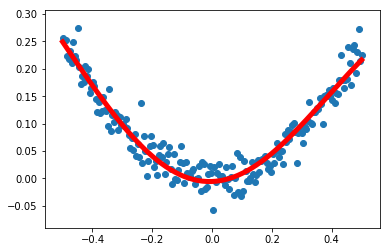

In [7]:
#总结：使得loss值不断减小，可以改变的四个变量是
#      Weights_L1，Weights_L2，biases_L1 ，biases_L2 

#使用 numpy 來产生200個樣本點
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]    #维度，x_data是均匀分布的，200行
noise = np.random.normal(0, 0.02, x_data.shape)        #干扰项
y_data = np.square(x_data) + noise

#定义兩個placeholder，目的在於 train時候透過 feed 傳入 x_data 与 y_data
x = tf.placeholder(tf.float32, [None, 1])   #維度為 ?*1，行不确定，但列只有一列
y = tf.placeholder(tf.float32, [None, 1])   #接收到的是200行


#定義神經網路的結構，解决回归但问题
#输入x，得到y，使得y与真实值接近
#输入层和输出层是一个神经元，中间层十个神经元

#定義中間層，總共10個神經元
Weights_L1 = tf.Variable(tf.random_normal([1, 10])) #定義權值變數，並且初始化為 normal 1*10，形状是一行十列
biases_L1 = tf.Variable(tf.zeros([1,10])) #定義bias變數，偏置层，並且初始化為0矩陣

# matmul矩阵乘法
Wx_plus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1  # Weights_L1*x + Biases_L1
L1 = tf.nn.tanh(Wx_plus_b_L1)      #中間层的輸出 (激活函數為 双曲正切函數)


#定義輸出層，总共1個神經元
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
# 输出层信号的总和
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2  # Weights_L2*L1 + Biases_L2 (輸出層的輸入，是中間層的輸出L1)
prediction = tf.nn.tanh(Wx_plus_b_L2)



#二次代价函數 : loss = mean((y - prediction)^2)
#mean求平均值
loss = tf.reduce_mean(tf.square(y - prediction))

#使用梯度下降法优化（训练）
#Gradient desent method  (learning rate = 0.1)
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)   #最小化 代價函數 (operator)


#初始化變數 operator
init = tf.global_variables_initializer()

#開始training
with tf.Session() as sess:
    sess.run(init) #變數初始化
    
    feed_dict = {x : x_data, y : y_data} #訓練時 要傳入的 feed 的字典
    
    for _ in range(2000):
        sess.run(train_step, feed_dict)   
      # sess.run(train_step, feed_dict = {x: x_data, y :y_data})
        
        
    #获得預測值
    feed_pre_dict = {x : x_data} #觀察預測值時 要傳入的 feed 的字典,只需传入x
    prediction_value = sess.run(prediction, feed_pre_dict) #預測值
    
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)     #散点图形式
    
    # 'r-'中'r'代表画的线是红色，'-'代表是实线，lw=5表示线宽是5
    plt.plot(x_data, prediction_value, 'r-', lw=5)   #预测的结果
    
    plt.show()
